# Standard Data Wrangling Commands

***Python-centric, version 0.8***

Anton Antonov
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)
[SimplifiedMachineLearningWorkflows-book at GitHub](https://github.com/antononcube/SimplifiedMachineLearningWorkflows-book)
September 2022

------

## Introduction

This document demonstrates and exemplifies the abilities of the Raku package ["DSL::English::DataQueryWorkflow"](https://raku.land/zef:antononcube/DSL::English::DataQueryWorkflows), [AAp1], to produce executable code that fits majority of the data wrangling use cases.

The examples should give a good idea of the English-based Domain Specific Language (DSL) utilized by [AAp1].

The data wrangling in Python is done with the packages: ["pandas"](https://pandas.pydata.org).

This notebook has examples that were used in the presentation ["Multi-language Data-Wrangling Conversational Agent"](https://www.youtube.com/watch?v=pQk5jwoMSxs), [AAv1].
That presentation is an introduction to data wrangling from a more general, multi-language perspective.

*It is assumed that the readers of this notebook are familiar with the general data processing workflow discussed in the presentation [AAv1].*

For detailed introduction into data wrangling (with- and in Raku) see the article ["Introduction to data wrangling with Raku"](https://rakuforprediction.wordpress.com/2021/12/31/introduction-to-data-wrangling-with-raku/), [AA1]. (And its Bulgarian version [AA2].)

Some of the datasets are acquired with the package ["ExampleDatasets"](https://pypi.org/project/ExampleDatasets/).

The data wrangling sections have two parts: a code generation part, and an execution steps part.

### Generated code

- Jupyter notebooks allow the invocation of shell commands and the definition of command aliases. Both of these features are leveraged.
- The Raku package [AAp1] is utilized in this Jupyter notebook through package's Command Line Interface (CLI) script `ToDataQueryWorkflowCode`.
- Additionally, the CLI script `ToDataQueryWorkflowCode` allows its code results to be copied to the clipboard of the host Operating System (OS).


------

## Setup

### Shell alias

Make an alias for the UNIX (macOS or Linux) Command Line Interface (CLI) program `ToDataQueryWorkflowCode`:

In [1]:
alias to_pandas ToDataQueryWorkflowCode Python::pandas %s

Show the aliases:

In [2]:
%alias

Total number of aliases: 13


[('cat', 'cat'),
 ('cp', 'cp'),
 ('ldir', 'ls -F -G -l %l | grep /$'),
 ('lf', 'ls -F -l -G %l | grep ^-'),
 ('lk', 'ls -F -l -G %l | grep ^l'),
 ('ll', 'ls -F -l -G'),
 ('ls', 'ls -F -G'),
 ('lx', 'ls -F -l -G %l | grep ^-..x'),
 ('mkdir', 'mkdir'),
 ('mv', 'mv'),
 ('rm', 'rm'),
 ('rmdir', 'rmdir'),
 ('to_pandas', 'ToDataQueryWorkflowCode Python::pandas %s')]

### Load packages

In [3]:
import pandas
import numpy
from ExampleDatasets import *
import matplotlib.pyplot as plt

### Load data

In order to use file sources with *unverified* Secure Sockets Layer (SSL) we use this code:

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Titanic data

We can obtain the Titanic dataset provided by project ["MathematicaVsR"](https://github.com/antononcube/MathematicaVsR):

In [5]:
dfTitanic = pandas.read_csv("https://raw.githubusercontent.com/antononcube/MathematicaVsR/master/Data/MathematicaVsR-Data-Titanic.csv");
dfTitanic.shape

(1309, 5)

#### Anscombe's quartet

The dataset named ["Anscombe's quartet"](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) has four datasets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed.

Anscombe's quartet is (usually) given in a table with eight columns that is somewhat awkward to work with. Below we demonstrate data transformations that make plotting of the four datasets easier. The DSL specifications used make those data transformations are programming language independent.

We can obtain the Anscombe's dataset using the function `example_dataset` provided by "ExampleDatasets", [AAp4]:

In [6]:
dfAnscombe = example_dataset('anscombe');
dfAnscombe.shape

(11, 9)

#### Star Wars films data

We can obtain [Star Wars films](https://en.wikipedia.org/wiki/List_of_Star_Wars_films) datasets using the `pandas` function `read_csv`:

In [7]:
dfStarwars = pandas.read_csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwars.csv")
dfStarwarsFilms = pandas.read_csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsFilms.csv")
dfStarwarsStarships = pandas.read_csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsStarships.csv")
dfStarwarsVehicles = pandas.read_csv("https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsVehicles.csv")

Here are the dimensions of the obtained data frames:

In [8]:
{x : eval(x).shape for x in ("dfStarwars", "dfStarwarsFilms", "dfStarwarsStarships", "dfStarwarsVehicles")}

{'dfStarwars': (87, 11),
 'dfStarwarsFilms': (173, 2),
 'dfStarwarsStarships': (31, 2),
 'dfStarwarsVehicles': (13, 2)}

------

## Multi-language translation

In this section show that the Raku package "DSL::English::DataQueryWorkflows" generates code for multiple programming languages.
Also, it translates the English DSL into DSLs of other natural languages.

### Programming languages

In [9]:
!raku -e 'use DSL::English::DataQueryWorkflows; my $command0 = "use dfTitanic; group by passengerClass; counts;"; <Python Raku R R::tidyverse WL>.map({ say "\n{ $_ }:\n", ToDataQueryWorkflowCode($command0, target => $_) })'


Python:
obj = dfTitanic.copy()
obj = obj.groupby(["passengerClass"])
obj = obj.size()

Raku:
$obj = dfTitanic ;
$obj = group-by($obj, "passengerClass") ;
$obj = $obj>>.elems

R:
obj <- dfTitanic ;
obj <- split( x = obj, f = "passengerClass" ) ;
obj = length(obj)

R::tidyverse:
dfTitanic %>%
dplyr::group_by(passengerClass) %>%
dplyr::count()

WL:
obj = dfTitanic;
obj = GroupBy[ obj, #["passengerClass"]& ];
obj = Map[ Length, obj]


### Natural languages

In [10]:
!raku -e 'use DSL::English::DataQueryWorkflows; my $command0 = "use dfTitanic; group by passengerClass; counts;"; <Bulgarian Korean Russian Spanish>.map({ say "\n{ $_ }:\n", ToDataQueryWorkflowCode($command0, target => $_) })'


Bulgarian:
използвай таблицата: dfTitanic
групирай с колоните: passengerClass
намери броя

Korean:
테이블 사용: dfTitanic
열로 그룹화: passengerClass
하위 그룹의 크기 찾기

Russian:
использовать таблицу: dfTitanic
групировать с колонками: passengerClass
найти число

Spanish:
utilizar la tabla: dfTitanic
agrupar con columnas: "passengerClass"
encontrar recuentos


------

## Using `ToDataQueryWorkflowCode`

The Raku package "DSL::English::DataQueryWorkflows", [AAp1], provides the Command Line Interface (CLI) script `ToDataQueryWorkflowCode`.
That script has optional arguments that control its output.

Here is script's usage message:

In [11]:
!ToDataQueryWorkflowCode --help

Translates natural language commands into data transformations programming code.
Usage:
  ToDataQueryWorkflowCode [-t|--target=<Str>] [-l|--language=<Str>] [-f|--format=<Str>] [-c|--clipboard-command=<Str>] <command> -- Main CLI signature.
  ToDataQueryWorkflowCode [-l|--language=<Str>] [-f|--format=<Str>] [-c|--clipboard-command=<Str>] <target> <command> -- Easier target specification.
  ToDataQueryWorkflowCode [-t|--target=<Str>] [-l|--language=<Str>] [-f|--format=<Str>] [-c|--clipboard-command=<Str>] [<words> ...] -- Command given as a sequence of words.
  
    <command>                       A string with one or many commands (separated by ';').
    -t|--target=<Str>               Target (programming language with optional library spec.) [default: 'Whatever']
    -l|--language=<Str>             The natural language to translate from. [default: 'English']
    -f|--format=<Str>               The format of the output, one of 'Whatever', 'code', 'hash', or 'raku'. [default: 'Whatever']

------

## Trivial workflow

In this section we demonstrate code generation and execution results for very simple (and very frequently used) sequence of data wrangling operations.

### Code generation

For the simple specification:

In [12]:
command0 = """
use dfTitanic;
group by passengerClass;
show counts;
"""

We generate target code with `ToDataQueryWorkflowCode` using the alias `to_pandas` defined above:

In [13]:
%to_pandas '{command0}'

obj = dfTitanic.copy()
obj = obj.groupby(["passengerClass"])
print(obj.size())


Here is the execution and result of the aliased shell command:

In [14]:
obj = dfTitanic.copy()
obj = obj.groupby(["passengerClass"])
obj = obj.size()
obj

passengerClass
1st    323
2nd    277
3rd    709
dtype: int64

**Remark:** Executing the commands above puts the generated code into the clipboard of the Operating System (OS).

### Execution steps (Raku)

Get the dataset into a "pipeline object":

In [15]:
obj = dfTitanic.copy()
obj.shape

(1309, 5)

Group by column:

In [16]:
obj = obj.groupby(["passengerClass"])
len(obj)

3

Assign group sizes to the "pipeline object":

In [17]:
obj = obj.size()
obj

passengerClass
1st    323
2nd    277
3rd    709
dtype: int64

------

## Cross tabulation

[Cross tabulation](https://en.wikipedia.org/wiki/Contingency_table) is a fundamental data wrangling operation. For the related transformations to long- and wide-format see the section "Complicated and neat workflow".

### Code generation

Here we define a command that filters the Titanic dataset and then makes cross-tabulates:

In [18]:
command1 = """use dfTitanic;
filter with passengerSex is 'male' and passengerSurvival equals 'died' or passengerSurvival is 'survived' ;
cross tabulate passengerClass, passengerSurvival over passengerAge;
take pipeline value
"""

In [19]:
%to_pandas "{command1}"

obj = dfTitanic.copy()
obj = obj[((obj["passengerSex"]== "male") & (obj["passengerSurvival"]== "died")) | ((obj["passengerSurvival"]== "survived"))]
obj = pandas.crosstab( index = obj.passengerClass, columns = obj.passengerSurvival, values = obj.passengerAge, aggfunc = "sum" )
obj


#### Execution

In [20]:
obj = dfTitanic.copy()
obj = obj[((obj["passengerSex"]== "male") & (obj["passengerSurvival"]== "died")) | ((obj["passengerSurvival"]== "survived"))]
obj = pandas.crosstab( index = obj.passengerClass, columns = obj.passengerSurvival, values = obj.passengerAge, aggfunc = "sum" )
obj

passengerSurvival,died,survived
passengerClass,,
1st,4290,6671
2nd,4419,2776
3rd,7562,2720


### Execution steps (Python)

Copy the Titanic data into a "pipeline object" and show its dimensions and a sample of it:


In [21]:
obj = dfTitanic.copy()
print("Titanic dimensions:", dfTitanic.shape)
obj.head(7)

Titanic dimensions: (1309, 5)


,id,passengerClass,passengerAge,passengerSex,passengerSurvival
0,1,1st,30,female,survived
1,2,1st,0,male,survived
2,3,1st,0,female,died
3,4,1st,30,male,died
4,5,1st,20,female,died
5,6,1st,50,male,survived
6,7,1st,60,female,survived


Filter the data and show the number of rows in the result set:

In [22]:
obj = obj[((obj["passengerSex"]== "male") & (obj["passengerSurvival"]== "died")) | ((obj["passengerSurvival"]== "survived"))]
len(obj)

1182

Cross tabulate and show the result:

In [23]:
obj = pandas.crosstab( index = obj.passengerClass, columns = obj.passengerSurvival, values = obj.passengerAge, aggfunc = "sum" )
obj

passengerSurvival,died,survived
passengerClass,,
1st,4290,6671
2nd,4419,2776
3rd,7562,2720


------

## Formulas with column references

In this section we discuss formula utilization to mutate data.

Special care has to be taken when the specifying data mutations with formulas that reference to columns in the dataset.

The code corresponding to the `transform ...` line in this example produces
*expected* result for the target "R::tidyverse":

In [24]:
command2 = """use data frame dfStarwars;
keep the columns name, homeworld, mass & height;
transform with bmi = `mass/height^2*10000`;
filter rows by bmi >= 30 & height < 200;
arrange by the variables mass & height descending"""

In [25]:
%to_pandas '{command2}'

obj = dfStarwars.copy()
obj = obj[["name", "homeworld", "mass", "height"]]
obj = obj.assign( bmi = mass/height^2*10000 )
obj = obj[((obj["bmi"]>= 30) & (obj["height"]< 200))]
obj = obj.sort_values( ["mass", "height"], ascending = False )


Specifically, for "Python:pandas" the transform specification line has to refer to the context variable `$_`.
Here is an example:


In [26]:
command2p = """
use data frame dfStarwars;
transform with bmi = `obj["mass"]/obj["height"]**2*10000` and homeworld = `obj["homeworld"].str.upper()`;
take pipeline value
"""

In [27]:
%to_pandas '{command2p}';

obj = dfStarwars.copy()
obj = obj.assign( bmi = obj["mass"]/obj["height"]**2*10000, homeworld = obj["homeworld"].str.upper() )
obj


In [28]:
obj = dfStarwars.copy()
obj = obj.assign( bmi = obj["mass"]/obj["height"]**2*10000, homeworld = obj["homeworld"].str.upper() )
obj

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,bmi
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,TATOOINE,Human,26.027582
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,TATOOINE,Droid,26.892323
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,NABOO,Droid,34.722222
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,TATOOINE,Human,33.330066
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,ALDERAAN,Human,21.777778
...,...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human,NaN
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human,NaN
84,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid,NaN
85,Captain Phasma,NaN,NaN,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN


**Remark:** Note that we have to use single quotes for the command invocation; using double quotes will invoke the string interpolation feature.

------

## Grouping awareness

In this section we discuss the treatment of multiple "group by" invocations within the same DSL specification.

### Code generation

Since there is no expectation to have a dedicated data transformation monad -- in whatever programming language -- we can try to make the command sequence parsing to be "aware" of the grouping operations.

In the following example before applying the grouping operation in fourth line we have to flatten the data (which is grouped in the second line):

In [29]:
command3 = """use dfTitanic;
group by passengerClass;
echo counts;
group by passengerSex;
show counts"""

In [30]:
%to_pandas '{command3}'

obj = dfTitanic.copy()
obj = obj.groupby(["passengerClass"])
print(obj.size())
obj = pandas.concat([g for k, g in obj])
obj = obj.groupby(["passengerSex"])
print(obj.size())


### Execution

Here we execute the generated code:

In [31]:
obj = dfTitanic.copy()
obj = obj.groupby(["passengerClass"])
print(obj.size())
obj = pandas.concat([g for k, g in obj])
obj = obj.groupby(["passengerSex"])
print(obj.size())

passengerClass
1st    323
2nd    277
3rd    709
dtype: int64
passengerSex
female    466
male      843
dtype: int64


### Execution steps (Python)

First grouping:

In [32]:
obj = dfTitanic.copy()
obj = obj.groupby(["passengerClass"])
print(obj.size())

passengerClass
1st    323
2nd    277
3rd    709
dtype: int64


Before doing the second grouping we flatten the groups of the first:

In [33]:
obj = pandas.concat([grp for g, grp in obj])
obj

,id,passengerClass,passengerAge,passengerSex,passengerSurvival
0,1,1st,30,female,survived
1,2,1st,0,male,survived
2,3,1st,0,female,died
3,4,1st,30,male,died
4,5,1st,20,female,died
...,...,...,...,...,...
1304,1305,3rd,10,female,died
1305,1306,3rd,-1,female,died
1306,1307,3rd,30,male,died
1307,1308,3rd,30,male,died


Here we do the second grouping and print-out the group sizes:

In [34]:
obj = obj.groupby(["passengerSex"])
print(obj.size())

passengerSex
female    466
male      843
dtype: int64


------

## Non-trivial workflow

In this section we generate and demonstrate data wrangling steps that clean, mutate, filter, group, and summarize a given dataset.

### Code generation


In [35]:
command4 = """
use dfStarwars;
replace missing with `0`;
mutate with "mass" = `obj["mass"]` and "height" = `obj["height"]`;
show dimensions;
echo summary;
filter by birth_year greater than 27;
select homeworld, mass and height;
group by homeworld;
show counts;
summarize the variables mass and height with mean and median
"""

In [36]:
%to_pandas '{command4}'

obj = dfStarwars.copy()
obj = obj.replace( numpy.nan,0)
obj = obj.assign( mass = obj["mass"], height = obj["height"] )
print(obj.shape[0])
print(obj.describe())
obj = obj[((obj["birth_year"]> 27))]
obj = obj[["homeworld", "mass", "height"]]
obj = obj.groupby(["homeworld"])
print(obj.size())
obj = obj.agg({"mass" : ["mean", "median"], "height" : ["mean", "median"]})


### Execution steps (Python)

Here is code that cleans the data of missing values, and shows dimensions and summary (corresponds to the first five lines above):

In [37]:
obj = dfStarwars.copy()
obj = obj.replace( numpy.nan,0)
obj = obj.assign( mass = obj["mass"], height = obj["height"] )
print(obj.shape[0])
print(obj.describe())

87
           height         mass  birth_year
count   87.000000    87.000000   87.000000
mean   162.333333    65.993103   43.279310
std     55.671726   146.483028  116.727963
min      0.000000     0.000000    0.000000
25%    164.000000     0.000000    0.000000
50%    178.000000    56.200000    0.000000
75%    190.500000    80.000000   50.000000
max    264.000000  1358.000000  896.000000


Here is a sample of the dataset (wrangled so far):

In [38]:
obj.head(4)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,0,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,0,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human


Here we select the columns "homeworld", "mass", and "height", group by "homeworld", and show counts for each group:

In [39]:
obj = obj[((obj["birth_year"]> 27))]
obj = obj[["homeworld", "mass", "height"]]
obj = obj.groupby(["homeworld"])
obj.size()

homeworld
0               2
Alderaan        1
Bespin          1
Cerea           1
Chandrila       1
Concord Dawn    1
Corellia        1
Coruscant       1
Dathomir        1
Eriadu          1
Haruun Kal      1
Kamino          1
Kashyyyk        1
Mirial          2
Mon Cala        1
Naboo           5
Nal Hutta       1
Rodia           1
Ryloth          1
Serenno         1
Socorro         1
Stewjon         1
Tatooine        7
Trandosha       1
dtype: int64

Here is summarization at specified columns with specified functions:

In [40]:
obj = obj.agg({"mass" : ["mean", "median"], "height" : ["mean", "median"]})
obj

mass         height       
                mean  median   mean median
homeworld                                 
0               53.0    53.0  129.5  129.5
Alderaan         0.0     0.0  191.0  191.0
Bespin          79.0    79.0  175.0  175.0
Cerea           82.0    82.0  198.0  198.0
Chandrila        0.0     0.0  150.0  150.0
Concord Dawn    79.0    79.0  183.0  183.0
Corellia        80.0    80.0  180.0  180.0
Coruscant        0.0     0.0  170.0  170.0
Dathomir        80.0    80.0  175.0  175.0
Eriadu           0.0     0.0  180.0  180.0
Haruun Kal      84.0    84.0  188.0  188.0
Kamino          78.2    78.2  183.0  183.0
Kashyyyk       112.0   112.0  228.0  228.0
Mirial          53.1    53.1  168.0  168.0
Mon Cala        83.0    83.0  180.0  180.0
Naboo           43.6    45.0  162.0  170.0
Nal Hutta     1358.0  1358.0  175.0  175.0
Rodia           74.0    74.0  173.0  173.0
Ryloth          55.0    55.0  178.0  178.0
Serenno         80.0    80.0  193.0  193.0
Socorro         79.0    79.0  177.0  177.0
Stewjon         77.0    77.0  182.0  182.0
Tatooine        70.0    75.0  178.0  178.0
Trandosha      113.0   113.0  190.0  190.0


------

## Joins

In this section we demonstrate the fundamental operation of joining two datasets.

### Code generation


In [41]:
command5 = """
use dfStarwarsFilms;
left join with dfStarwars by 'name';
replace missing with `0`;
sort by name, film desc;
take pipeline value
"""

In [42]:
%to_pandas '{command5}'

obj = dfStarwarsFilms.copy()
obj = obj.merge( dfStarwars, on = ["name"], how = "left" )
obj = obj.replace( numpy.nan,0)
obj = obj.sort_values( ["name", "film"], ascending = False )
obj


### Execution

In [43]:
obj = dfStarwarsFilms.copy()
obj = obj.merge( dfStarwars, on = ["name"], how = "left" )
obj = obj.replace( numpy.nan,0)
obj = obj.sort_values( ["name", "film"], ascending = False )
obj

,name,film,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
146,Zam Wesell,Attack of the Clones,168.0,55.0,blonde,"fair, green, yellow",yellow,0.0,female,feminine,Zolan,Clawdite
65,Yoda,The Phantom Menace,66.0,17.0,white,green,brown,896.0,male,masculine,0,Yoda's species
63,Yoda,The Empire Strikes Back,66.0,17.0,white,green,brown,896.0,male,masculine,0,Yoda's species
66,Yoda,Revenge of the Sith,66.0,17.0,white,green,brown,896.0,male,masculine,0,Yoda's species
67,Yoda,Return of the Jedi,66.0,17.0,white,green,brown,896.0,male,masculine,0,Yoda's species
...,...,...,...,...,...,...,...,...,...,...,...,...
41,Anakin Skywalker,Attack of the Clones,188.0,84.0,blond,fair,blue,41.9,male,masculine,Tatooine,Human
122,Adi Gallia,The Phantom Menace,184.0,50.0,none,dark,blue,0.0,female,feminine,Coruscant,Tholothian
123,Adi Gallia,Revenge of the Sith,184.0,50.0,none,dark,blue,0.0,female,feminine,Coruscant,Tholothian
82,Ackbar,The Force Awakens,180.0,83.0,none,brown mottle,orange,41.0,male,masculine,Mon Cala,Mon Calamari


------

## Complicated and neat workflow

In this section we demonstrate a fairly complicated data wrangling sequence of operations that transforms [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet) into a form that is easier to plot.

**Remark:** Anscombe's quartet has four sets of points that have nearly the same x- and y- mean values. (But the sets have very different shapes.)

### Code generation

In [44]:
command6 = """
use dfAnscombe;
convert to long form;
separate the data column "Variable" into "Variable" and "Set" with separator pattern "";
to wide form for id columns Set and "Unnamed: 0" variable column Variable and value column Value
"""

In [45]:
%to_pandas '{command6}'

obj = dfAnscombe.copy()
obj = pandas.melt( obj, id_vars = obj.columns[0], var_name = "Variable", value_name = "Value" )
obj[["Variable", "Set"]] = obj["Variable"].str.extract(pat = r"(.)(.)", expand = True)
obj = obj.pivot(index = ( "Set", "Unnamed: 0" ), columns = "Variable", values = "Value")


### Execution

In [46]:
obj = dfAnscombe.copy()
obj = pandas.melt( obj, id_vars = obj.columns[0], var_name = "Variable", value_name = "Value" )
obj[["Variable", "Set"]] = obj["Variable"].str.extract(pat = r"(.)(.)", expand = True)
obj = obj.pivot(index = ( "Set", "Unnamed: 0" ), columns = "Variable", values = "Value")
obj

Variable           x      y
Set Unnamed: 0             
1   1           10.0   8.04
    2            8.0   6.95
    3           13.0   7.58
    4            9.0   8.81
    5           11.0   8.33
    6           14.0   9.96
    7            6.0   7.24
    8            4.0   4.26
    9           12.0  10.84
    10           7.0   4.82
    11           5.0   5.68
2   1           10.0   9.14
    2            8.0   8.14
    3           13.0   8.74
    4            9.0   8.77
    5           11.0   9.26
    6           14.0   8.10
    7            6.0   6.13
    8            4.0   3.10
    9           12.0   9.13
    10           7.0   7.26
    11           5.0   4.74
3   1           10.0   7.46
    2            8.0   6.77
    3           13.0  12.74
    4            9.0   7.11
    5           11.0   7.81
    6           14.0   8.84
    7            6.0   6.08
    8            4.0   5.39
    9           12.0   8.15
    10           7.0   6.42
    11           5.0   5.73
4   1            8.0   6.58
    2            8.0   5.76
    3            8.0   7.71
    4            8.0   8.84
    5            8.0   8.47
    6            8.0   7.04
    7            8.0   5.25
    8           19.0  12.50
    9            8.0   5.56
    10           8.0   7.91
    11           8.0   6.89

### Execution steps (Python)

Get a copy of the dataset into a "pipeline object":


In [58]:
obj = dfAnscombe;
obj

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91



Summarize Anscombe's quartet (using "Data::Summarizers", [AAp3]):

In [55]:
obj.describe()

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.000000,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,1.000000,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,3.500000,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,6.000000,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,8.500000,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,11.000000,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


**Remark:** From the table above it is not clear how exactly we have to access the data in order to plot each of Anscombe's sets. The data wrangling steps below show a way to separate the sets and make them amenable for set-wise manipulations.

Very often values of certain data parameters are conflated and put into dataset's column names. (As in Anscombe's dataset.)

In those situations we:

- Convert the dataset into long format, since that allows column names to be treated as data

- Separate the values of a certain column into to two or more columns

Reshape the "pipeline object" into [long format](https://en.wikipedia.org/wiki/Wide_and_narrow_data):

In [59]:
obj = pandas.melt( obj, id_vars = obj.columns[0], var_name = "Variable", value_name = "Value" )
obj

,Unnamed: 0,Variable,Value
0,1,x1,10.00
1,2,x1,8.00
2,3,x1,13.00
3,4,x1,9.00
4,5,x1,11.00
...,...,...,...
83,7,y4,5.25
84,8,y4,12.50
85,9,y4,5.56
86,10,y4,7.91


Separate the data column "Variable" into the columns "Variable" and "Set":

In [60]:
obj[["Variable", "Set"]] = obj["Variable"].str.extract(pat = r"(.)(.)", expand = True)
obj.head(7)

,Unnamed: 0,Variable,Value,Set
0,1,x,10.0,1
1,2,x,8.0,1
2,3,x,13.0,1
3,4,x,9.0,1
4,5,x,11.0,1
5,6,x,14.0,1
6,7,x,6.0,1


Reshape the "pipeline object" into [wide format](https://en.wikipedia.org/wiki/Wide_and_narrow_data) using appropriate identifier-, variable-, and value column names:

In [61]:
obj = obj.pivot(index = ( "Set", "Unnamed: 0" ), columns = "Variable", values = "Value")
obj.head(9)

Variable           x      y
Set Unnamed: 0             
1   1           10.0   8.04
    2            8.0   6.95
    3           13.0   7.58
    4            9.0   8.81
    5           11.0   8.33
    6           14.0   9.96
    7            6.0   7.24
    8            4.0   4.26
    9           12.0  10.84

Plot each dataset of Anscombe's quartet:

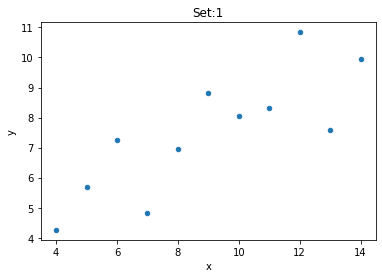

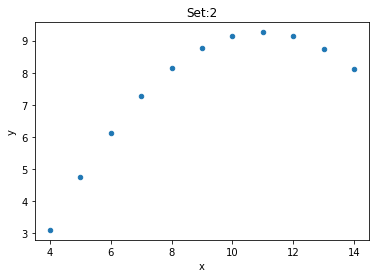

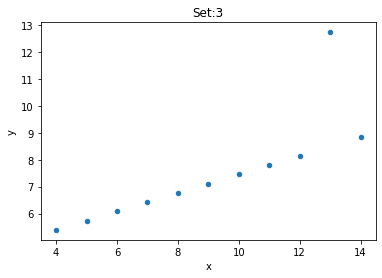

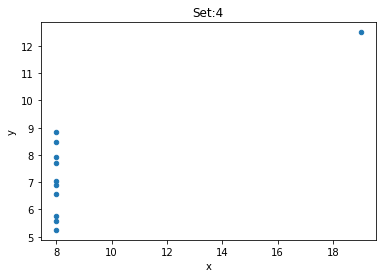

In [62]:
for k, g in obj.groupby("Set"):
    g.plot.scatter(x = "x", y = "y", title = "Set:" + str(k))

------

## References

### Articles

[AA1] Anton Antonov, ["Introduction to data wrangling with Raku"](https://rakuforprediction.wordpress.com/2021/12/31/introduction-to-data-wrangling-with-raku/) , (2021), [RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA2] Anton Antonov, ["Увод в обработката на данни с Raku"](https://rakuforprediction.wordpress.com/2022/05/24/увод-в-обработката-на-данни-с-raku/), (2022), [RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[HW1] Hadley Wickham, ["The Split-Apply-Combine Strategy for Data Analysis"](https://www.jstatsoft.org/article/view/v040i01), (2011), [Journal of Statistical Software](https://www.jstatsoft.org/).

### Packages

[AAp1] Anton Antonov, [DSL::English::DataQueryWorkflows Raku package](https://github.com/antononcube/Raku-DSL-English-DataQueryWorkflows), (2020-2022), [GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov, [DSL::Bulgarian Raku package](https://github.com/antononcube/Raku-DSL-Bulgarian), (2022), [GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov, [DSL::Shared::Utilities::ComprehensiveTranslations Raku package](https://github.com/antononcube/Raku-Text-Plot), (2020-2022), [GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov, [Example Datasets, Python package](https://pypi.org/project/ExampleDatasets/), (2021-2022), [PyPI.org](https://pypi.org).

### Videos

[AAv1] Anton Antonov, ["Multi-language Data-Wrangling Conversational Agent"](https://www.youtube.com/watch?v=pQk5jwoMSxs), (2020), [Wolfram Technology Conference 2020, YouTube/Wolfram](https://www.youtube.com/channel/UCJekgf6k62CQHdENWf2NgAQ).
